In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import os
import random
import shutil
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
base_dir = '/content/drive/MyDrive/capstone'
data_dir = '/content/drive/MyDrive/capstone/cocoa_diseases'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

In [4]:
folder_path = '/content/drive/MyDrive/capstone/cocoa_diseases/black_pod_rot'
item = os.listdir(folder_path)
count = len(item)

print(f"Jumlah isi dalam folder: {count}")

Jumlah isi dalam folder: 500


In [5]:
folder_path = '/content/drive/MyDrive/capstone/cocoa_diseases/pod_borer'
item = os.listdir(folder_path)
count = len(item)

print(f"Jumlah isi dalam folder: {count}")

Jumlah isi dalam folder: 208


In [6]:
folder_path = '/content/drive/MyDrive/capstone/cocoa_diseases/healthy'
item = os.listdir(folder_path)
count = len(item)

print(f"Jumlah isi dalam folder: {count}")

Jumlah isi dalam folder: 500


In [7]:
# Define the class names
class_names = ['black_pod_rot', 'healthy', 'pod_borer']

# Define the desired split ratios (adjust as needed)
train_ratio = 0.8  # 70% for training
test_ratio = 0.1   # 20% for testing
valid_ratio = 0.1  # 10% for validation

# Iterate over each class directory
for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    images = os.listdir(class_dir)
    random.shuffle(images)
    total_images = len(images)

    # Split the images into train, test, and validation sets
    train_split = int(train_ratio * total_images)
    test_split = int((train_ratio + test_ratio) * total_images)

    train_images = images[:train_split]
    test_images = images[train_split:test_split]
    valid_images = images[test_split:]

    # Move images to respective directories
    for image in train_images:
        src_path = os.path.join(class_dir, image)
        dst_path = os.path.join(train_dir, class_name, image)
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        shutil.copy(src_path, dst_path)

    for image in test_images:
        src_path = os.path.join(class_dir, image)
        dst_path = os.path.join(test_dir, class_name, image)
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        shutil.copy(src_path, dst_path)

    for image in valid_images:
        src_path = os.path.join(class_dir, image)
        dst_path = os.path.join(validation_dir, class_name, image)
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        shutil.copy(src_path, dst_path)

print("Data splitting completed successfully!")

Data splitting completed successfully!


In [8]:
print(len(os.listdir(data_dir)))
print(len(os.listdir(train_dir)))
print(len(os.listdir(test_dir)))
print(len(os.listdir(validation_dir)))

3
3
3
3


In [9]:
# Function to count the number of files in a directory
def count_files(directory):
    count = sum([len(files) for r, d, files in os.walk(directory)])
    return count

# Count the number of files in each directory
data_count = count_files(data_dir)
train_count = count_files(train_dir)
test_count = count_files(test_dir)
valid_count = count_files(validation_dir)

# Print the results
print("Total data count:", data_count)
print("Train data count:", train_count)
print("Test data count:", test_count)
print("Validation data count:", valid_count)

Total data count: 1208
Train data count: 966
Test data count: 121
Validation data count: 266


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from keras.optimizers import SGD
from keras.applications import MobileNetV2

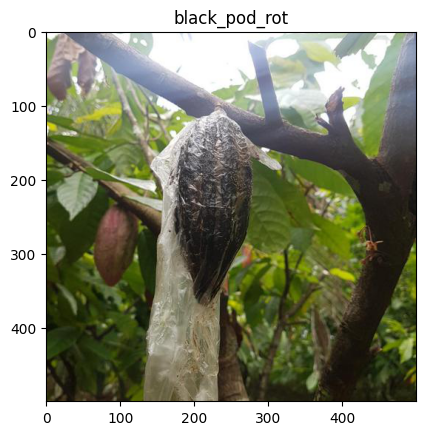

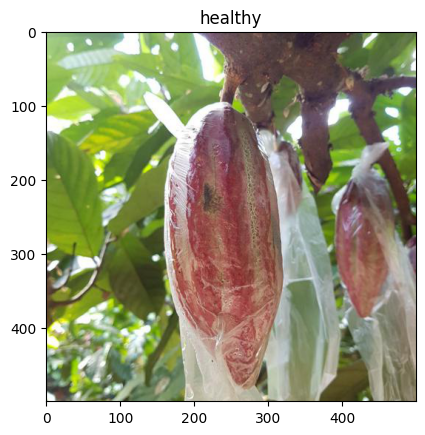

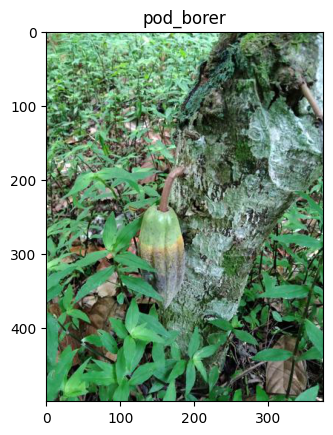

In [13]:
sample_images = 1

for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        image_list = os.listdir(class_path)
        random.shuffle(image_list)  # Shuffle the list of images
        sample_list = image_list[:sample_images]  # Select a sample of images

        for image_name in sample_list:
            image_path = os.path.join(class_path, image_name)
            # Load and display the image
            image = Image.open(image_path)
            plt.imshow(image)
            plt.title(class_name)
            plt.show()

In [14]:
image_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)


validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
)

Found 966 images belonging to 3 classes.
Found 266 images belonging to 3 classes.


In [15]:
class_labels = train_generator.class_indices
print(class_labels)

{'black_pod_rot': 0, 'healthy': 1, 'pod_borer': 2}


In [35]:
# Load the MobileNetV2 model and keep the convolutional base frozen
conv_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_base.trainable = False

# Add new layers on top of the frozen convolutional base
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model with a low learning rate and high momentum to fine-tune the pre-trained layers
model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_20 (Dense)            (None, 64)                81984     
                                                                 
 dense_21 (Dense)            (None, 3)                 195       
                                                                 
Total params: 2,340,163
Trainable params: 82,179
Non-trainable params: 2,257,984
__________________________________________

In [36]:
epochs = 50
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

Epoch 1/50
31/31 [==============================] - 78s 2s/step - loss: 1.2157 - accuracy: 0.3654 - val_loss: 1.0090 - val_accuracy: 0.4925
Epoch 2/50
31/31 [==============================] - 74s 2s/step - loss: 0.9843 - accuracy: 0.5186 - val_loss: 0.9691 - val_accuracy: 0.5226
Epoch 3/50
31/31 [==============================] - 74s 2s/step - loss: 0.9383 - accuracy: 0.5497 - val_loss: 0.9108 - val_accuracy: 0.5602
Epoch 4/50
31/31 [==============================] - 74s 2s/step - loss: 0.8963 - accuracy: 0.5787 - val_loss: 0.8928 - val_accuracy: 0.5714
Epoch 5/50
31/31 [==============================] - 74s 2s/step - loss: 0.8593 - accuracy: 0.5921 - val_loss: 0.8528 - val_accuracy: 0.6128
Epoch 6/50
31/31 [==============================] - 65s 2s/step - loss: 0.7981 - accuracy: 0.6408 - val_loss: 0.8246 - val_accuracy: 0.6278
Epoch 7/50
31/31 [==============================] - 72s 2s/step - loss: 0.8071 - accuracy: 0.6304 - val_loss: 0.8055 - val_accuracy: 0.6316
Epoch 8/50
31/31 [==

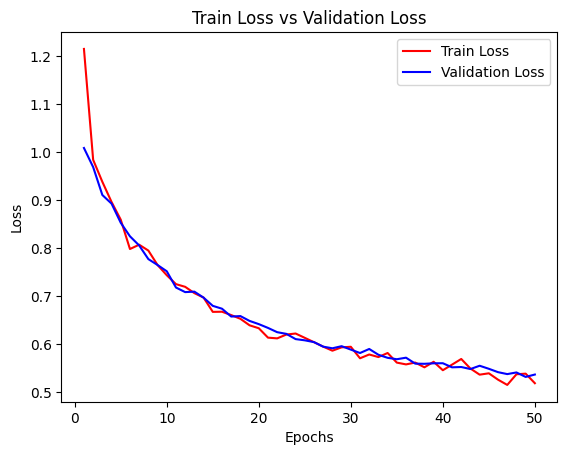

In [37]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot train loss dan validation loss
plt.plot(epochs, train_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Train Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

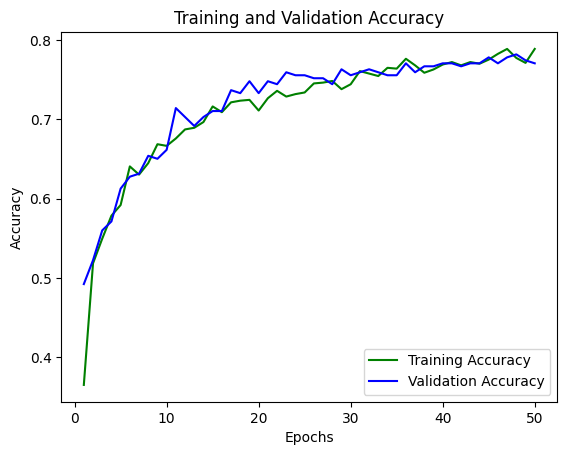

In [38]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'g', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [39]:
# Evaluasi model
val_loss, val_acc = model.evaluate(validation_generator)
print('Validation Loss: ',val_loss),
print('Validation Accuracy: ',val_acc)

9/9 [==============================] - 10s 1s/step - loss: 0.5361 - accuracy: 0.7707
Validation Loss:  0.5361055731773376
Validation Accuracy:  0.7706766724586487
